- https://facebook.github.io/prophet/docs/quick_start.html#python-api
- http://datalove.hatenadiary.jp/entry/python/prophet/getting-started-with-facebook-machine-learning-library-for-time-series-analysis
- https://www.slideshare.net/hoxo_m/prophet-facebook-76285278
- https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from fbprophet import Prophet
from numpy.random import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import math
import pickle
import time
import datetime
import json
import itertools
import collections
import os

In [2]:
df_market_spread=pd.read_csv("View of Market Spread_2017.csv")
df_market_spread.Date=pd.to_datetime(df_market_spread.Date)
df_market_spread.index = df_market_spread.Date
df_market_spread.head()

,bitFlyer,Quoine,BtcBox,Zaif,coincheck,Spread pair,Max spread,Date
Date,,,,,,,,
2016-12-15 01:56:00,90474,90663.00000,90454.0,90445,90799,coincheck - Zaif,354.0,2016-12-15 01:56:00
2016-12-15 02:01:00,90508,90659.84543,90542.0,90500,90849,coincheck - Zaif,349.0,2016-12-15 02:01:00
2016-12-15 02:06:00,90637,90799.58457,90657.0,90620,90950,coincheck - Zaif,330.0,2016-12-15 02:06:00
2016-12-15 02:11:00,90620,90771.10274,90877.0,90650,90943,coincheck - bitFlyer,323.0,2016-12-15 02:11:00
2016-12-15 02:16:00,90626,90808.00000,90793.0,90630,90894,coincheck - bitFlyer,268.0,2016-12-15 02:16:00


In [3]:
df_market_spread["spread_quoine_coincheck"] = df_market_spread["Quoine"] - df_market_spread["coincheck"] 

In [18]:
df_market_spread_2017=df_market_spread[(df_market_spread['Date']>"2017-10-01") & (df_market_spread['Date']<"2017-12-31")]

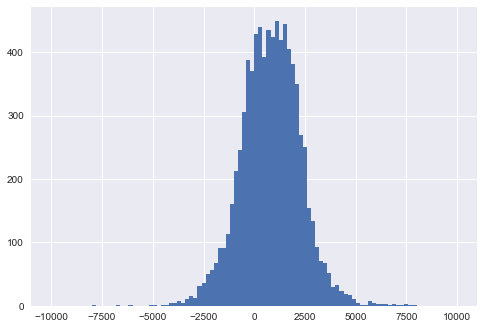

In [19]:
df_market_spread_2017["spread_quoine_coincheck"].hist(bins=100, range=(-10000, 10000))

In [20]:
df=pd.DataFrame()
df[["ds","y"]]=df_market_spread_2017[["Date","spread_quoine_coincheck"]]
df=df[(df['y']>-10000) & (df['y']<10000)]

In [21]:
df.head()

,ds,y
Date,,
2017-10-01 00:06:00,2017-10-01 00:06:00,-170.0
2017-10-01 00:16:00,2017-10-01 00:16:00,49.0
2017-10-01 00:21:00,2017-10-01 00:21:00,36.0
2017-10-01 00:26:00,2017-10-01 00:26:00,164.0
2017-10-01 00:31:00,2017-10-01 00:31:00,-300.0


In [22]:
df.tail()

,ds,y
Date,,
2017-10-29 13:31:00,2017-10-29 13:31:00,1908.0
2017-10-29 13:41:00,2017-10-29 13:41:00,1740.0
2017-10-29 13:46:00,2017-10-29 13:46:00,1948.0
2017-10-29 13:51:00,2017-10-29 13:51:00,1583.0
2017-10-29 13:56:00,2017-10-29 13:56:00,2077.0


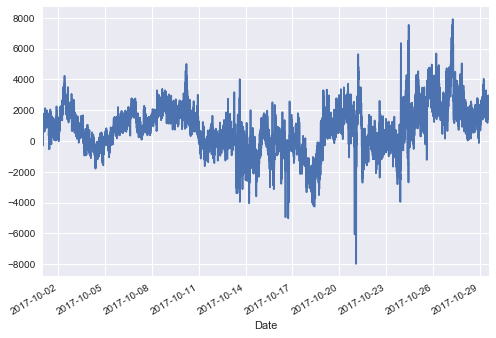

In [23]:
df["y"].plot()

In [24]:
m = Prophet()
m.fit(df)

In [36]:
# periodは予測期間
future = m.make_future_dataframe(periods=60*24*3, freq = 'min')
future.tail()

,ds
12435,2017-11-01 13:52:00
12436,2017-11-01 13:53:00
12437,2017-11-01 13:54:00
12438,2017-11-01 13:55:00
12439,2017-11-01 13:56:00


In [38]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
12435,2017-11-01 13:52:00,3556.714410,1452.358813,5552.116651
12436,2017-11-01 13:53:00,3557.539948,1471.396986,5708.689812
12437,2017-11-01 13:54:00,3558.364687,1479.368294,5732.321724
12438,2017-11-01 13:55:00,3559.188541,1438.506092,5723.593994
12439,2017-11-01 13:56:00,3560.011424,1460.310159,5822.348351


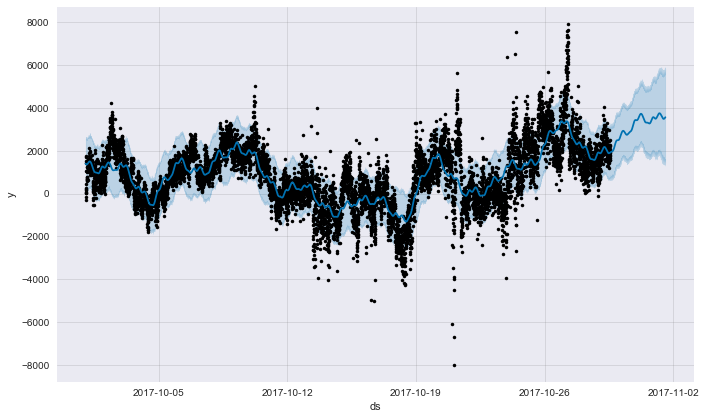

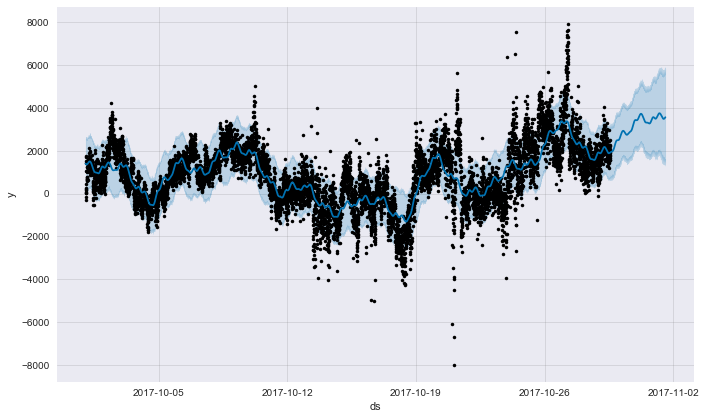

In [39]:
m.plot(forecast)

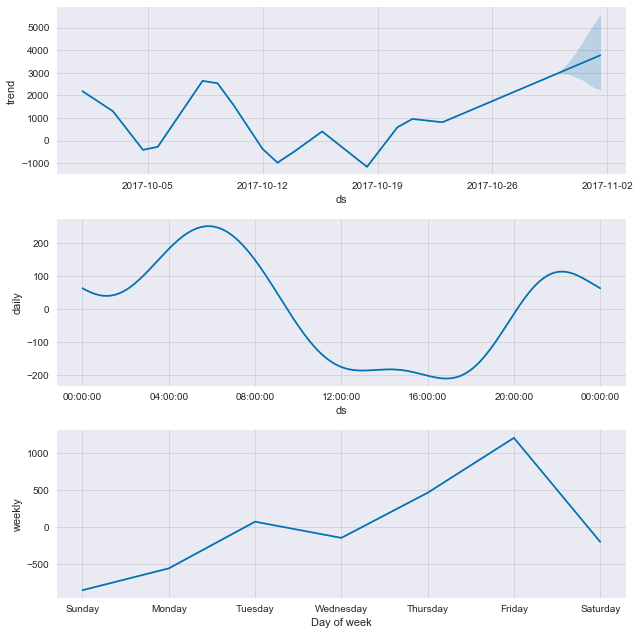

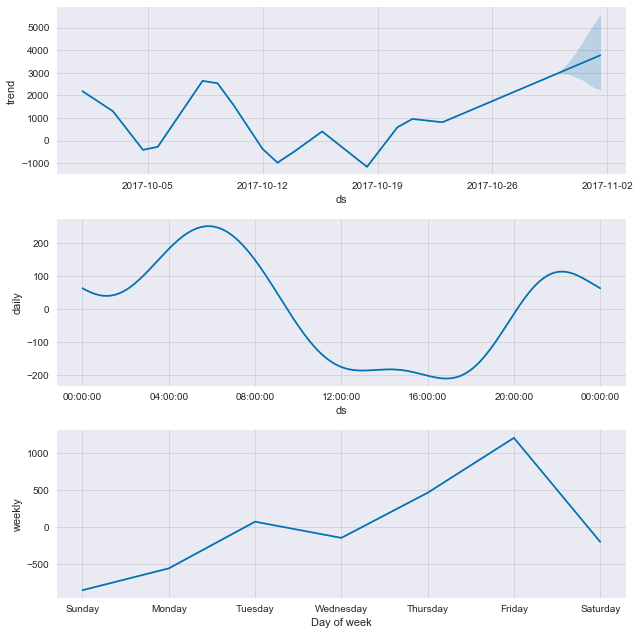

In [40]:
m.plot_components(forecast)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yhat
0,2017-10-01 00:06:00,2183.981092,2183.981092,2183.981092,203.934096,2589.242116,59.320649,59.320649,59.320649,-785.502476,-785.502476,-785.502476,-785.502476,-785.502476,-785.502476,-844.823125,-844.823125,-844.823125,1398.478615
1,2017-10-01 00:16:00,2180.684975,2180.684975,2180.684975,160.311229,2585.130947,53.848043,53.848043,53.848043,-790.940856,-790.940856,-790.940856,-790.940856,-790.940856,-790.940856,-844.788900,-844.788900,-844.788900,1389.744119
2,2017-10-01 00:21:00,2179.036917,2179.036917,2179.036917,114.262137,2543.292938,51.365617,51.365617,51.365617,-793.392200,-793.392200,-793.392200,-793.392200,-793.392200,-793.392200,-844.757818,-844.757818,-844.757818,1385.644716
3,2017-10-01 00:26:00,2177.388858,2177.388858,2177.388858,133.117312,2577.465766,49.077958,49.077958,49.077958,-795.639542,-795.639542,-795.639542,-795.639542,-795.639542,-795.639542,-844.717500,-844.717500,-844.717500,1381.749316
4,2017-10-01 00:31:00,2175.740800,2175.740800,2175.740800,164.467111,2545.162343,47.002775,47.002775,47.002775,-797.665230,-797.665230,-797.665230,-797.665230,-797.665230,-797.665230,-844.668005,-844.668005,-844.668005,1378.075570
5,2017-10-01 00:36:00,2174.092742,2174.092742,2174.092742,232.596030,2586.219089,45.156547,45.156547,45.156547,-799.452843,-799.452843,-799.452843,-799.452843,-799.452843,-799.452843,-844.609390,-844.609390,-844.609390,1374.639899
6,2017-10-01 00:41:00,2172.444683,2172.444683,2172.444683,132.373805,2545.184119,43.554458,43.554458,43.554458,-800.987253,-800.987253,-800.987253,-800.987253,-800.987253,-800.987253,-844.541711,-844.541711,-844.541711,1371.457430
7,2017-10-01 00:46:00,2170.796625,2170.796625,2170.796625,91.044484,2575.413094,42.210335,42.210335,42.210335,-802.254690,-802.254690,-802.254690,-802.254690,-802.254690,-802.254690,-844.465025,-844.465025,-844.465025,1368.541935
8,2017-10-01 00:51:00,2169.148567,2169.148567,2169.148567,186.541888,2585.376909,41.136603,41.136603,41.136603,-803.242784,-803.242784,-803.242784,-803.242784,-803.242784,-803.242784,-844.379387,-844.379387,-844.379387,1365.905783
9,2017-10-01 00:56:00,2167.500508,2167.500508,2167.500508,163.051866,2648.871023,40.344238,40.344238,40.344238,-803.940614,-803.940614,-803.940614,-803.940614,-803.940614,-803.940614,-844.284852,-844.284852,-844.284852,1363.559894
